In [208]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [226]:
l, m, t, g, A, omega = sp.symbols("l m t g A \omega", real=True)
the, x0t = sp.symbols(r"\theta x_0", cls=sp.Function)
the = the(t)
x0t = x0t(t)
x0t_d = sp.diff(x0t, t)
x0t_dd = sp.diff(x0t_d, t)
the_d = sp.diff(the, t)
the_dd = sp.diff(the_d, t)

In [227]:
x0t = A*sp.sin(omega*t)
x0t

A*sin(\omega*t)

In [228]:
the

\theta(t)

In [229]:
x1 = l*sp.sin(the) + x0t
x1

A*sin(\omega*t) + l*sin(\theta(t))

In [230]:
y1 = -l*sp.cos(the)
y1

-l*cos(\theta(t))

In [231]:
T = sp.Rational(1, 2) * m * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2)
V = m*g*y1
L = T - V
L.simplify()

m*(2*g*l*cos(\theta(t)) + l**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (A*\omega*cos(\omega*t) + l*cos(\theta(t))*Derivative(\theta(t), t))**2)/2

In [232]:
LE = sp.diff(sp.diff(L, the_d), t) - sp.diff(L, the).simplify()
LE
sol = sp.solve(LE, the_dd)
sol[0]

(A*\omega**2*sin(\omega*t)*cos(\theta(t)) - g*sin(\theta(t)))/l

In [233]:
dzdt_f = sp.lambdify((t, g, m, l, A, omega, the, the_d), sol[0])
dthedt_f = sp.lambdify(the, the)
x0t_f = sp.lambdify((A, omega, t), x0t)


In [234]:
def dSdt(S, t, g, m, l, A, omega):
    the, z = S
    return [dthedt_f(z), dzdt_f(t, g, m, l, A, omega, the, z)]

In [266]:
t = np.linspace(0, 20, 1001)
g = 9.81
m = 1
l = 2
A = 3.5
omega = 1
ans = odeint(dSdt, y0=[0, 0], t=t, args=(g,m,l,A,omega))

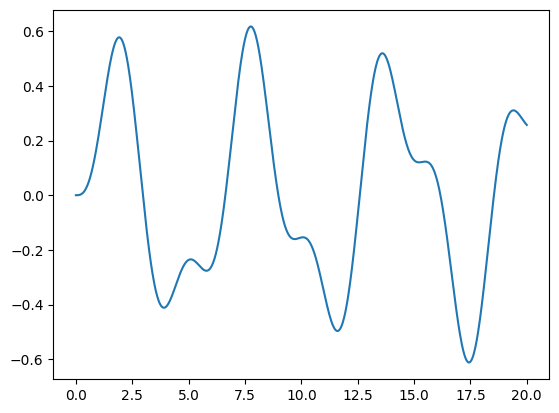

In [267]:
the = ans.T[0]
plt.plot(t, the)

In [264]:
def get_x1y1(t, the, l, A, omega):
    return (l*np.sin(the) + x0t_f(A, omega, t), -l*np.cos(the))

x1, y1 = get_x1y1(t, the, l, A, omega)

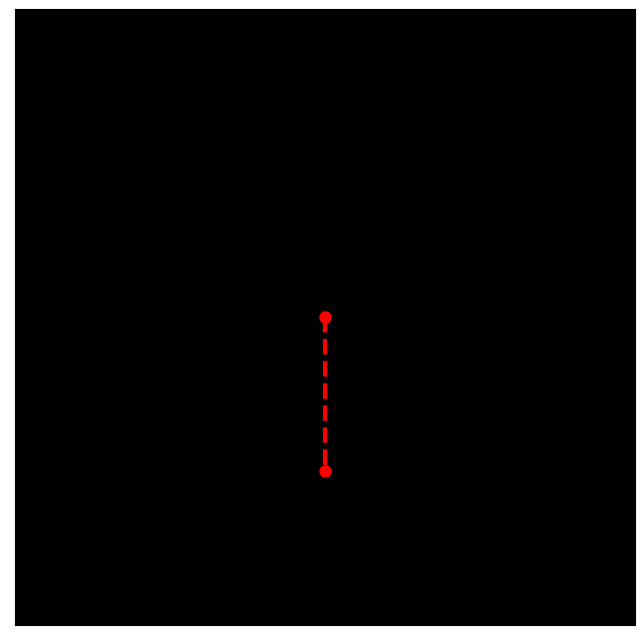

In [268]:
def animate(i):
    ln1.set_data([x0t_f(A, omega, t[i]), x1[i]], [0, y1[i]])


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor("k")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames = 1000, interval=50)
ani.save("pocket_watch.gif", writer='pillow', fps=50)